# Проект по SQL: анализ базы данных.

## Описание проекта
<a id="0"></a>

Компания решила купила крупный сервис для чтения книг по подписке.<br>

**Цель:** проанализировать базу данных сервиса и выполнить к ней заданные запросы.

**Задачи:**<br>
- Посчитайте, сколько книг вышло после 1 января 2000 года;
- Для каждой книги посчитайте количество обзоров и среднюю оценку;
- Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры;
- Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками;
- Посчитайте среднее количество обзоров от пользователей, которые поставили больше 48 оценок.

**Входные данные**<br>
Данные находятся в базе данных `data-analyst-final-project-db`. База данных содержит информацию о книгах, издательствах, авторах, а также пользовательские обзоры книг. Эти данные помогут сформулировать ценностное предложение для нового продукта.

**План выполнения проекта**<br>
1. Исследуовать таблицы в базе данных;
2. Сделать по одному SQL-запросу для решения каждого задания и вывести результаты каждого запроса;
3. Описать выводы по каждой из решённых задач.

### Описание базы данных

**Таблица `books`**<br>
Содержит данные о книгах:
- `book_id` — идентификатор книги;
- `author_id` — идентификатор автора;
- `title` — название книги;
- `num_pages` — количество страниц;
- `publication_date` — дата публикации книги;
- `publisher_id` — идентификатор издателя.

**Таблица `authors`**<br>
Содержит данные об авторах:
- `author_id` — идентификатор автора;
- `author` — имя автора.

**Таблица `publishers`**<br>
Содержит данные об издательствах:
- `publisher_id` — идентификатор издательства;
- `publisher` — название издательства;

**Таблица `ratings`**<br>
Содержит данные о пользовательских оценках книг:
- `rating_id` — идентификатор оценки;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, оставившего оценку;
- `rating` — оценка книги.

**Таблица `reviews`**<br>
Содержит данные о пользовательских обзорах:
- `review_id` — идентификатор обзора;
- `book_id` — идентификатор книги;
- `username` — имя автора обзора;
- `text` — текст обзора.

### Схема данных
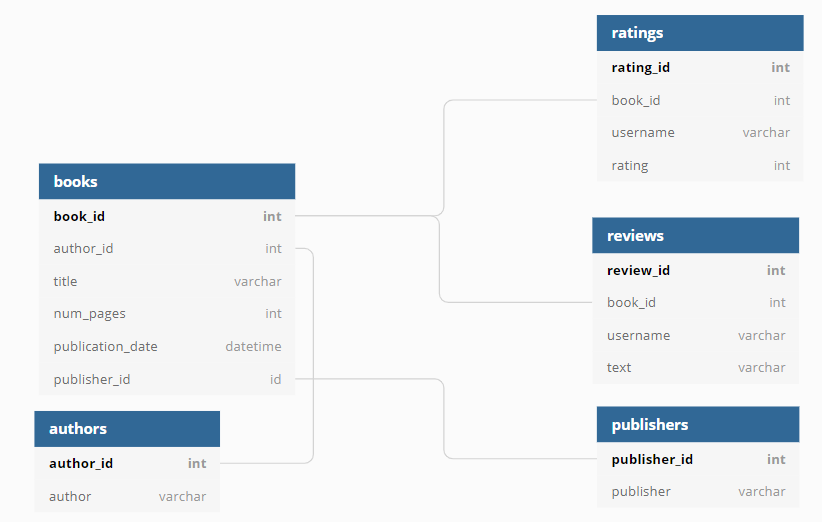

## Подготовка и обзор данных

In [1]:
pip install -q psycopg2-binary

Note: you may need to restart the kernel to use updated packages.


In [2]:
# импортируем библиотеки
import pandas as pd
from sqlalchemy import text, create_engine

In [3]:
# устанавливаем параметры
db_config = {'user': 'praktikum_student', # имя пользователя
'pwd': 'Sdf4$2;d-d30pp', # пароль
'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
'port': 6432, # порт подключения
'db': 'data-analyst-final-project-db'} # название базы данных
connection_string = 'postgresql://{user}:{pwd}@{host}:{port}/{db}'.format(**db_config)

# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'})
conn = engine.connect()

# чтобы выполнить SQL-запрос, используем Pandas
def read_sql(query):
    return pd.io.sql.read_sql(sql=text(query), con = conn)

**Таблица `books`**

In [4]:
query = "SELECT * FROM books LIMIT 5"
read_sql(query)

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


In [5]:
query = "SELECT COUNT(*) FROM books"
read_sql(query)

,count
0,1000


**Таблица `authors`**<br>

In [6]:
query = "SELECT * FROM authors LIMIT 5"
read_sql(query)

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


In [7]:
query = "SELECT COUNT(*) FROM authors"
read_sql(query)

,count
0,636


**Таблица `publishers`**<br>

In [8]:
query = "SELECT * FROM publishers LIMIT 5"
read_sql(query)

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


In [9]:
query = "SELECT COUNT(*) FROM publishers"
read_sql(query)

,count
0,340


**Таблица `ratings`**<br>

In [10]:
query = "SELECT * FROM ratings LIMIT 5"
read_sql(query)

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


In [11]:
query = "SELECT COUNT(*) FROM ratings"
read_sql(query)

,count
0,6456


**Таблица `reviews`**<br>

In [12]:
query = "SELECT * FROM reviews LIMIT 5"
read_sql(query)

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


In [13]:
query = "SELECT COUNT(*) FROM reviews"
read_sql(query)

,count
0,2793


## Задание 1
Посчитайте, сколько книг вышло после 1 января 2000 года;

In [14]:
query = """
SELECT COUNT(book_id) 
FROM books 
WHERE publication_date >= '2000-01-01'
"""
read_sql(query)

,count
0,821


**Вывод:**

После 1 января 2000 года вышла 821 книга.

## Задание 2
Для каждой книги посчитайте количество обзоров и среднюю оценку;

In [15]:
query = """ 
SELECT 
    books.book_id, 
    title, 
    COUNT(DISTINCT review_id) AS review_cnt, 
    ROUND(AVG(rating), 2) AS rating_avg
FROM 
    books 
    LEFT JOIN ratings ON books.book_id=ratings.book_id
    LEFT JOIN reviews ON books.book_id=reviews.book_id
GROUP BY books.book_id, title
ORDER BY rating_avg DESC, review_cnt DESC
"""

read_sql(query)

,book_id,title,review_cnt,rating_avg
0,17,A Dirty Job (Grim Reaper #1),4,5.00
1,553,School's Out—Forever (Maximum Ride #2),3,5.00
2,444,Moneyball: The Art of Winning an Unfair Game,3,5.00
3,642,The Big Bad Wolf (Alex Cross #9),2,5.00
4,967,Welcome to Temptation (Dempseys #1),2,5.00
...,...,...,...,...
995,915,The World Is Flat: A Brief History of the Twen...,3,2.25
996,202,Drowning Ruth,3,2.00
997,316,His Excellency: George Washington,2,2.00
998,371,Junky,2,2.00


In [16]:
# query_ = f""" 
# WITH X AS
# ({query})

# SELECT SUM(review_cnt)
# FROM X
# """
# read_sql(query_)

,sum
0,2793.0


**Вывод:**

Получили таблицу со списоком всех книг в базе данных, в котором указан индентификатор книги, название, количество обзоров на книгу и средний рейтинг. Таблица отсортирована по убыванию рейтинга книг, потом по убыванию количества обзоров.

- Книга с самым высоким рейтингом - A Dirty Job (Grim Reaper #1). У нее рейтинг 5.00 и 4 обзора.

## Задание 3
Определите издательство, которое выпустило наибольшее число книг толще 50 страниц — так вы исключите из анализа брошюры;

In [17]:
query = """ 
SELECT 
    publisher, 
    COUNT(book_id) AS book_cnt
FROM 
    books 
    LEFT JOIN publishers ON books.publisher_id=publishers.publisher_id
WHERE num_pages > 50
GROUP BY publisher
ORDER BY book_cnt DESC
LIMIT 1
"""
read_sql(query)

,publisher,book_cnt
0,Penguin Books,42


**Вывод:**

Издательство, которое выпустило наибольшее число книг толще 50 страниц — Penguin Books. Оно издало 42 книги.

## Задание 4
Определите автора с самой высокой средней оценкой книг — учитывайте только книги с 50 и более оценками;

In [18]:
query = """ 
SELECT 
    author,
    AVG(rating) AS rating_avg
FROM 
    books 
    LEFT JOIN ratings ON books.book_id=ratings.book_id
    LEFT JOIN authors ON books.author_id=authors.author_id
WHERE books.book_id IN (SELECT book_id 
                        FROM ratings
                        GROUP BY book_id 
                        HAVING COUNT(rating_id) >= 50)
GROUP BY books.author_id, author
ORDER BY rating_avg DESC
LIMIT 1
"""
read_sql(query)

,author,rating_avg
0,J.K. Rowling/Mary GrandPré,4.287097


**Вывод:**

J.K. Rowling/Mary GrandPré	- автор с самой высокой средней оценкой книг (с 50 и более оценками). Средняя оценка книг автора - 4.29.

## Задание 5
Посчитайте среднее количество обзоров от пользователей, которые поставили больше 48 оценок.

In [19]:
query = """ 
SELECT
    ROUND(AVG(review_cnt), 2) AS review_avg
FROM
    (SELECT username, COUNT(review_id) AS review_cnt 
     FROM reviews 
     GROUP BY username) X
WHERE username IN (SELECT username
                   FROM ratings
                   GROUP BY username 
                   HAVING COUNT(rating_id) > 48)
"""
read_sql(query)

,review_avg
0,24.0


**Вывод:**

Пользователи, поставившие более 48 оценок, в среднем пишут по 24 обзора.

## Общий вывод

1. Было проведено знакомство с таблицами базы данных и их содержимым.

2. К базе данных были составлены запросы, с помощью которых мы получили:
- После 1 января 2000 года вышла 821 книга.
- Книга с самым высоким рейтингом - A Dirty Job (Grim Reaper #1). У нее рейтинг 5.00 и 4 обзора.
- Издательство, которое выпустило наибольшее число книг толще 50 страниц — Penguin Books. Оно издало 42 книги.
- J.K. Rowling/Mary GrandPré - автор с самой высокой средней оценкой книг (с 50 и более оценками). Средняя оценка книг автора - 4.29.
- Пользователи, поставившие более 48 оценок, в среднем пишут по 24 обзора.